In [2]:
import cv2
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,Dense,MaxPooling2D,AveragePooling2D


In [3]:
dataset_path = "/content/drive/MyDrive/7-7 dataset"


idg = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    brightness_range=(0.2,1.0),
    horizontal_flip=True
)


train_data = idg.flow_from_directory(
    dataset_path,
    subset='training',
    target_size=(224,224),

)

Found 1090 images belonging to 14 classes.


In [4]:
validation_data = idg.flow_from_directory(
    dataset_path,
    shuffle=False,
    subset='validation',
    target_size=(224,224)

)

Found 268 images belonging to 14 classes.


In [5]:
model =  tf.keras.applications.InceptionV3(include_top=False,
                                     input_shape=(224,224,3),
                                     weights="imagenet")

87910968/87910968 [==============================] - 3s 0us/step


In [6]:
my_model = models.Sequential([
    model,
    Dropout(0.6),
    layers.Flatten(),
    Dropout(0.6),
    layers.Dense(2048,activation='relu'),
    layers.Dense(1024,activation='relu'),
    layers.Dense(14,activation='softmax'),

])

In [7]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 dropout (Dropout)           (None, 5, 5, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dropout_1 (Dropout)         (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 2048)              104859648 
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 14)                1

In [8]:
my_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=["accuracy"]
              )

In [9]:
history = my_model.fit(train_data,
                    validation_data=validation_data,
                    epochs=20)

Epoch 1/20
35/35 [==============================] - 538s 15s/step - loss: 2.9589 - accuracy: 0.2147 - val_loss: 2.2804 - val_accuracy: 0.2649
Epoch 2/20
35/35 [==============================] - 15s 422ms/step - loss: 1.7887 - accuracy: 0.4752 - val_loss: 1.7748 - val_accuracy: 0.4515
Epoch 3/20
35/35 [==============================] - 15s 416ms/step - loss: 0.9562 - accuracy: 0.6927 - val_loss: 1.4600 - val_accuracy: 0.5000
Epoch 4/20
35/35 [==============================] - 16s 452ms/step - loss: 0.6212 - accuracy: 0.7908 - val_loss: 0.7750 - val_accuracy: 0.7351
Epoch 5/20
35/35 [==============================] - 14s 409ms/step - loss: 0.5985 - accuracy: 0.8514 - val_loss: 0.6695 - val_accuracy: 0.7313
Epoch 6/20
35/35 [==============================] - 15s 415ms/step - loss: 0.7451 - accuracy: 0.8339 - val_loss: 0.5982 - val_accuracy: 0.8097
Epoch 7/20
35/35 [==============================] - 15s 416ms/step - loss: 0.2977 - accuracy: 0.9018 - val_loss: 0.4281 - val_accuracy: 0.8545


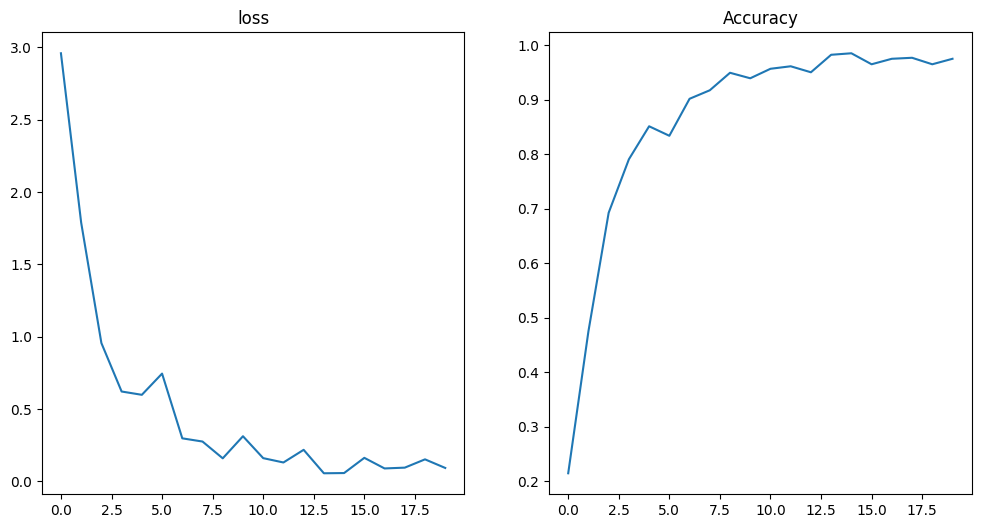

In [10]:
fig,(ax1,ax2)=plt.subplots(1,2 , figsize=(12,6))
ax1.plot(history.history['loss'])
ax1.set_title("loss")
ax2.plot(history.history['accuracy'])
ax2.set_title("Accuracy")
plt.show()

In [11]:
my_model.save("/content/drive/MyDrive/weights/7-7Faces_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
name_7_7 = ['Ali_Khamenei', 'Angelina_Jolie',
            'Barak_Obama', 'Behnam_Bani',
            'Donald_Trump','Emma_Watson',
            'Han_Hye_Jin', 'Kim_Jong_Un',
            'Leyla_Hatami','Lionel_Messi',
            'Michelle_Obama', 'Morgan_Freeman',
            'Queen_Elizabeth', 'Scarlett_Johansson']

In [13]:
Y_pred = my_model.predict(validation_data)
y_predict = np.argmax(Y_pred , axis=1)

9/9 [==============================] - 5s 378ms/step


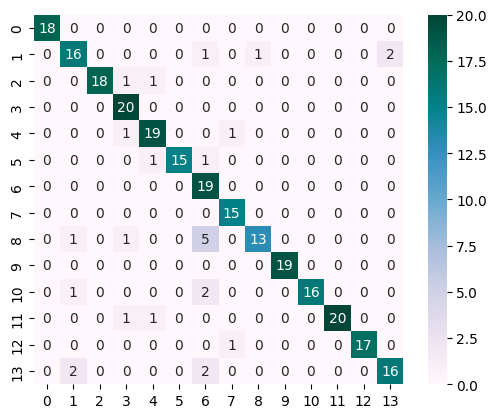

In [14]:
cm = confusion_matrix(validation_data.classes , y_predict)
sns.heatmap(cm, annot=True , cmap='PuBuGn' , fmt='.0f')
disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=name_7_7)
plt.imshow(cm)

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


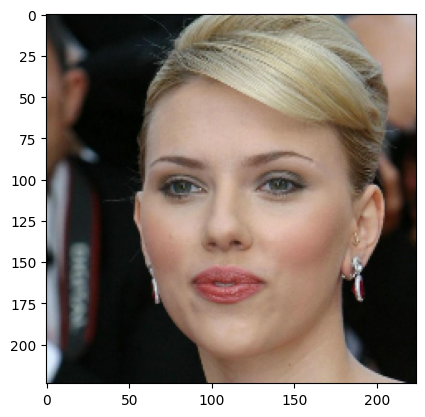

In [16]:
image = cv2.imread('/content/drive/MyDrive/7-7 dataset/Scarlett_Johansson/Scarlett-Johansson-01_01.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(224,224))
plt.imshow(image)


In [17]:
image = image / 255.0
image = image.reshape(1,224,224,3)

output = np.argmax(my_model.predict(image))
name_7_7[output]


1/1 [==============================] - 3s 3s/step


'Scarlett_Johansson'

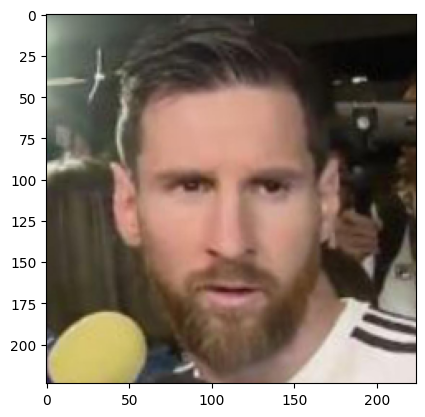

In [18]:
image2 = cv2.imread('/content/drive/MyDrive/7-7 dataset/Lionel_Messi/Lionel-Messi-13_01.jpg')
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
image2 = cv2.resize(image2,(224,224))
plt.imshow(image2)


In [19]:
image2 = image2 / 255.0
image2 = image2.reshape(1,224,224,3)

output = np.argmax(my_model.predict(image2))
name_7_7[output]

1/1 [==============================] - 0s 44ms/step


'Lionel_Messi'